1. load raw data

In [3]:
import pandas as pd
import numpy as np

data_with_na = pd.read_csv('../data/complete_raw_data.csv', parse_dates=['Date'], index_col='Date')
data_with_na.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2020-09-30 to 2025-09-30
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price                  1248 non-null   float64
 1   rain_Paranagua_PR      1827 non-null   float64
 2   temp_Paranagua_PR      1827 non-null   float64
 3   rain_MatoGrosso_MT     1827 non-null   float64
 4   temp_MatoGrosso_MT     1827 non-null   float64
 5   rain_Goias_GO          1827 non-null   float64
 6   temp_Goias_GO          1827 non-null   float64
 7   rain_MatoGrossoSul_MS  1827 non-null   float64
 8   temp_MatoGrossoSul_MS  1827 non-null   float64
 9   rain_RioGrandeSul_RS   1827 non-null   float64
 10  temp_RioGrandeSul_RS   1827 non-null   float64
 11  brent_oil              1259 non-null   float64
 12  cbot                   1257 non-null   float64
 13  usd_brl                1305 non-null   float64
dtypes: float64(14)
memory usage: 214.1 KB


2. Check missing data

In [5]:
# check for missing values
data_with_na.isnull().sum()

Price                    579
rain_Paranagua_PR          0
temp_Paranagua_PR          0
rain_MatoGrosso_MT         0
temp_MatoGrosso_MT         0
rain_Goias_GO              0
temp_Goias_GO              0
rain_MatoGrossoSul_MS      0
temp_MatoGrossoSul_MS      0
rain_RioGrandeSul_RS       0
temp_RioGrandeSul_RS       0
brent_oil                568
cbot                     570
usd_brl                  522
dtype: int64

In [6]:

def interpolate_missing(y):
    """
    Replaces NaN values in pd.Series `y` using linear interpolation
    """
    if y.isna().any():
        y = y.interpolate(method='linear', limit_direction='both')
    return y

data_interpolated = data_with_na.apply(interpolate_missing)
data_interpolated.isnull().sum()

Price                    0
rain_Paranagua_PR        0
temp_Paranagua_PR        0
rain_MatoGrosso_MT       0
temp_MatoGrosso_MT       0
rain_Goias_GO            0
temp_Goias_GO            0
rain_MatoGrossoSul_MS    0
temp_MatoGrossoSul_MS    0
rain_RioGrandeSul_RS     0
temp_RioGrandeSul_RS     0
brent_oil                0
cbot                     0
usd_brl                  0
dtype: int64

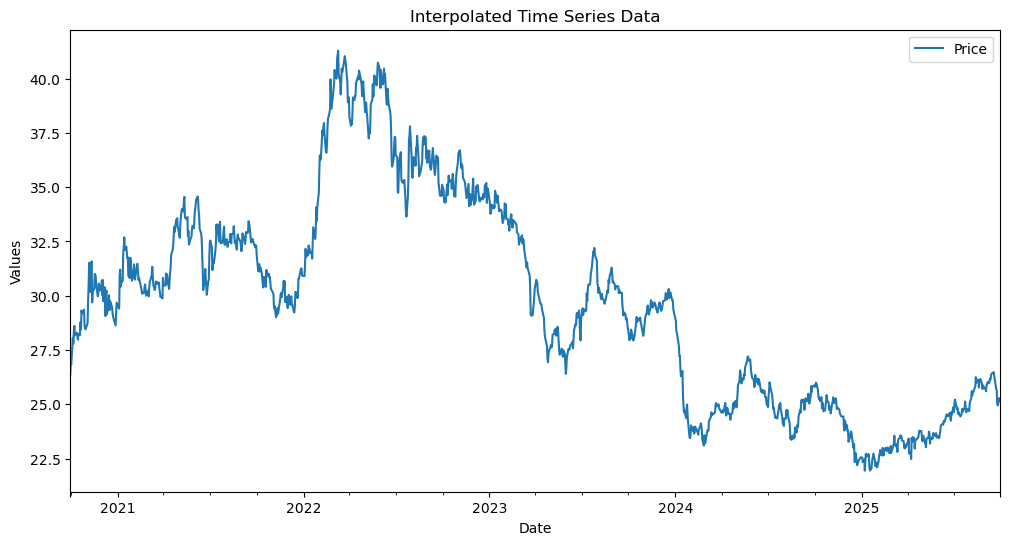

In [7]:
# visualize the results
import matplotlib.pyplot as plt
data_interpolated['Price'].plot(figsize=(12, 6))
plt.title('Interpolated Time Series Data')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(loc='best')
plt.show()

In [8]:
data_interpolated.to_csv('../data/processed_data.csv')